<a href="https://colab.research.google.com/github/vijaybendigeri/ML-AI/blob/master/CRYPTO_INVESTMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# INSTALL PACKAGES
!pip install requests==2.27.0
!pip install folium==0.2.1
!pip install yfinance
!pip install finta
!pip install bt

# INSTALL AND IMPORT talib PACKAGE
url = 'https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files'
ext = '0.4.0-oneiric1_amd64.deb -qO'
!wget $url/libta-lib0_$ext libta.deb
!wget $url/ta-lib0-dev_$ext ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib

# IMPORT PACKAGES
import talib, bt
from finta import TA
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, datetime, yfinance as yf
from datetime import date, datetime, timedelta
from pandas_datareader import data
from termcolor import colored
import calendar, plotly, requests, math, os
# import plotly.graph_objs as go
# from bs4 import BeautifulSoup

%matplotlib inline
sns.set()
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for folium: filename=folium-0.2.1-py3-none-any.whl size=79808 sha256=4b917fc752e36bb77cf933cede001eadf9d9dc2c177c5fda9cdd5bce233f5933
  Stored in directory: /root/.cache/pip/wheels/47/2a/da/acfca4f9cb052fe6965a6b1b472e62ee2c4c36cecd859233f1
Successfully built folium
  Attempting uninstall: folium
    Found existing installation: folium 0.14.0
    Uninstalling folium-0.14.0:
      Successfully uninstalled folium-0.14.0


ImportError: ignored

In [ ]:
# functions
def load_data(ticker, start_date, end_date): 
  '''
  This function imports the stock panel data from start_date to the end_date
  '''
  panel_data=yf.download(ticker, start=start_date, end=end_date, progress=False).reset_index()
  panel_data.columns=[x.lower().replace(' ', '') for x in panel_data.columns]
  all_weekdays=pd.date_range(start=start_date, end=end_date, freq='B')
  panel_data=panel_data[panel_data.date.isin(all_weekdays)]
  # close=panel_data[['date', 'close']]
  close=panel_data
  close['close']=close.close.fillna(method='ffill')
  return close

def buysell(coin, start, end): 
  df=load_data(coin, start, end)
  df=df.drop(['adjclose'], axis=1)
  df=pd.concat([df, TA.BBANDS(df)], axis=1)
  df=df.dropna()
  df.plot(x='date', y=['close', 'BB_UPPER','BB_MIDDLE', 'BB_LOWER'], figsize=(30, 10))

# initiate connection with google drive
from google.colab import drive
drive.mount('/content/gdrive')             

Mounted at /content/gdrive


In [ ]:
# top 100 crypto tickers
import pandas as pd, numpy as np
coinmarketcap=['BTC', 'ETH', 'BNB', 'SOL', 'ADA', 'XRP', 'LUNA', 'DOT', 'AVAX', 'DOGE', 'SHIB', 'MATIC', 'CRO', 'WBTC', 'UNI', 'ALGO', 'LTC', 'LINK', 'NEAR', 'BCH', 'ATOM', 'TRX', 'XLM', 'FTM', 'MANA',
        'AXS', 'HBAR', 'VET', 'FTT', 'SAND', 'ICP', 'FIL', 'BTCB', 'THETA', 'EGLD', 'ETC', 'HNT', 'XMR', 'XTZ', 'MIOTA', 'LEO', 'AAVE', 'KLAY', 'ONE', 'GRT', 'GALA', 'EOS', 'CAKE', 'STX',
        'FLOW', 'BTT', 'LRC', 'CRV', 'KSM', 'MKR', 'ENJ', 'BSV', 'QNT', 'XEC', 'ZEC', 'AMP', 'KDA', 'AR', 'CELO', 'BAT', 'RUNE', 'NEO', 'CHZ', 'KCS', 'OKB', 'WAVES', 'DASH', 'HT', 'ROSE', 'NEXO',
        'YFI', 'COMP', 'HOT', 'MINA', 'XDC', 'IOTX', 'XEM', 'SUSHI', '1INCH', 'TFUEL', 'RVN', 'CEL', 'DCR', 'GNO', 'REV', 'ZIL', 'IMX', 'WAXP']

# SWAGGY STOCK TRENDS
# general stock trends 
general=['TSLA', 'AAPL', 'SPY', 'GME', 'NET', 'VTI', 'CAR', 'VOO', 'PLTR', 'TLRY', 'GLD', 'MSFT', 'NVDA', 'ICLN', 'EVGO', 'URG', 'SENS', 'CLSK', 'AMD', 'SLV', 'AMZN', 'OIL', 'ASHX', 'TQQQ', 'FB']
news=['TSLA', 'AAPL', 'NIO', 'GOOGL', 'GOOG', 'AMZN', 'NVDA', 'T', 'PFE', 'FB', 'PTON', 'HOOD', 'VZ', 'NVAX', 'F', 'USO', 'XOP', 'IEO', 'OIH', 'PXJ', 'BNO', 'MARA', 'UCO', 'DBO', 'OIL']
wsb=['TSLA', 'AAPL', 'MSFT', 'NVDA', 'GME', 'RBLX', 'AMD', 'F', 'AMZN', 'TSM', 'QQQ', 'AMC', 'PLTR', 'SOFI', 'NIO', 'HIMX', 'WISH', 'LCID', 'BABA', 'HOOD', 'DIS', 'FB', 'GLD', 'TLRY', 'MRNA']
crypto=['BTC-USD', 'ETH-USD', 'ALBO-USD', 'LINK-USD', 'XMR-USD', 'ATOM-USD', 'SOL-USD', 'FTM-USD', 'ADA-USD', 'MATIC-USD', 'CRO-USD', 'LRC-USD', 'DOT-USD', 'SHIB-USD', 'SNT-USD', 'AVAX-USD', 'ADS-USD',
        'USDT-USD', 'DOGE-USD', 'ALT-USD', 'SAFEMOON-USD', 'SHILL-USD', 'XRP-USD', 'LUNA-USD', 'SPIRIT-USD']

# preprocess crypto tickers available on binance and coinbase
binance=pd.read_excel(r'/content/gdrive/MyDrive/FINANCE_WEALTH/momentum-investing-master/binance_coinbase.xlsx', names=['name', 'exchange'])
binance['ticker']=binance.name.apply(lambda x: x.split('(')[-1].replace(')', '').strip())
binance=np.array(binance.ticker.unique())

# coinbase=pd.read_excel(r'/content/gdrive/MyDrive/FINANCE_WEALTH/momentum-investing-master/binance_coinbase.xlsx', 'coinbase', names=['names'])
# coinbase=coinbase.drop_duplicates(['names'], keep='first')
# coins=[]
# for sign in coinbase['names']: 
#   if 'logo' not in str(sign): 
#     ticker=str(sign).split(' ')[-1].strip()
#     coins.append(ticker)
# coinbase=coins

coins=['1INCH', 'AAVE', 'ALGO', 'AMP', 'ANKR', 'REP', 'AVAX', 'AXS', 'BAND', 'BAT', 'BTC', 'BCH', 'BNB', 'BUSD', 'ADA', 'CTSI', 'LINK', 'COMP', 'ATOM', 'CRV', 'DAI', 'DASH', 'MANA', 'DOGE', 'EGLD',
       'ENJ', 'EOS', 'ETH', 'ETC', 'FTM', 'FIL', 'ONE', 'HBAR', 'HNT', 'Zen', 'ICX', 'KNC', 'LTC', 'MKR', 'IOTA', 'NANO', 'NEAR', 'NEO','OMG', 'ONT', 'OXT', 'PAXG', 'DOT', 'MATIC', 'QTUM', 'RVN', 'SHIB',
       'SOL', 'XLM', 'STORJ', 'SUSHI', 'USDT', 'XTZ', 'GRT', 'UNI', 'USDC', 'VET', 'VTHO', 'WAVES', 'YFI', 'ZEC', 'ZIL', 'ZRX', 'ALCX', 'ACH', 'AGLD', 'FORTH', 'API3', 'ARPA', 'ASM', 'AVT',
       'BADGER', 'BAL', 'BNT', 'BOND', 'BICO', 'BLZ', 'FIDA', 'AUCTION', 'BTRST', 'CGLD', 'CHZ', 'CVC', 'CLV', 'COTI', 'COVAL', 'CTX', 'CRO', 'DESO', 'DDX', 'YFII', 'DIA', 'DNT', 'MLN', 'ENS', 'FET',
       'FX', 'GALA', 'GTC', 'GODS', 'GFI', 'GNT', 'GYEN', 'FARM', 'ZEN', 'IDEX', 'RLC', 'IMX', 'ICP', 'INV', 'IOTX', 'JASMY', 'KEEP', 'KRL', 'LCX', 'LQTY', 'LPT', 'LOOM', 'LRC', 'MPL', 'MASK', 'MDT', 'MIR',
       'MCO2', 'MUSD', 'ALICE', 'NKN', 'NU', 'NMR', 'ORCA', 'OGN', 'TRAC', 'ORN', 'UPI', 'PAX', 'PERP', 'PLA', 'PLU', 'POLS', 'POLY', 'NCT', 'POWR', 'PRO', 'QNT', 'QSP', 'QUICK', 'RAD', 'RAI', 'RLY', 'RGT',
       'RARI', 'REN', 'RNDR', 'REQ', 'RBN', 'FOX', 'SHPING', 'SKL', 'SPELL', 'STX', 'SUKU', 'SUPER', 'SNX', 'TBTC', 'TRB', 'UST', 'TRIBE', 'TRU', 'UMA', 'UNFI', 'VGX', 'WBTC', 'wCFG', 'WLUNA', 'XYO']

In [ ]:
binance

array(['1INCH', 'AAVE', 'ALGO', 'AMP', 'ANKR', 'REP', 'AVAX', 'AXS',
       'BAND', 'BAT', 'BTC', 'BCH', 'BNB', 'BUSD', 'ADA', 'CTSI', 'LINK',
       'COMP', 'ATOM', 'CRV', 'DAI', 'DASH', 'MANA', 'DOGE', 'EGLD',
       'ENJ', 'EOS', 'ETH', 'ETC', 'FTM', 'FIL', 'ONE', 'HBAR', 'HNT',
       'Zen', 'ICX', 'KNC', 'LTC', 'MKR', 'IOTA', 'NANO', 'NEAR', 'NEO',
       'OMG', 'ONT', 'OXT', 'PAXG', 'DOT', 'MATIC', 'QTUM', 'RVN', 'SHIB',
       'SOL', 'XLM', 'STORJ', 'SUSHI', 'USDT', 'XTZ', 'GRT', 'UNI',
       'USDC', 'VET', 'VTHO', 'WAVES', 'YFI', 'ZEC', 'ZIL'], dtype=object)

In [ ]:
# import sentiment data and convert it into a pandas dataframe 
from bs4 import BeautifulSoup
url='https://api.alternative.me/fng/?limit=0&format=csv'
website_url=requests.get(url).text
soup=BeautifulSoup(website_url, 'html.parser')
soup=pd.DataFrame(soup)

cols=['date', 'fng_value', 'fng_classification']
sentiment=pd.DataFrame(columns=cols)
sent=soup.iloc[0, 0]
sent=sent.split('[\n')[1].split('date')[1].split(']')[0].split('\n')
sent=sent[1:-1]
date
i=0

for row in sent:
  # print(row)
  sentiment.loc[i, 'date']=row.split(',')[0]
  sentiment.loc[i, 'fng_value']=row.split(',')[1]
  sentiment.loc[i, 'fng_classification']=row.split(',')[-1]
  i+=1

sentiment['year']=sentiment.date.apply(lambda x: int(x.split('-')[-1]))
sentiment['month']=sentiment.date.apply(lambda x: int(x.split('-')[1]))
sentiment['day']=sentiment.date.apply(lambda x: int(x.split('-')[0]))
sentiment['date']=pd.to_datetime(sentiment[['year', 'month', 'day']])
sentiment.index=sentiment.date
sentiment=sentiment.drop(['year', 'month', 'day', 'date'], axis=1)
sentiment.columns=['sentval', 'sentclass']
sentiment['sentval']=sentiment.sentval.astype(int)

NameError: ignored

In [ ]:
from finta import TA
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, datetime, yfinance as yf
from datetime import date, datetime, timedelta
from pandas_datareader import data
from termcolor import colored
import calendar, plotly, requests, math, os
import talib, bt

SyntaxError: ignored

In [ ]:
invest=1000
ticker='btc-USD'
end_date=date.today()
btc=load_data(ticker, '2018-02-05', end_date)
btc.head()

NameError: ignored

In [ ]:
sentiment.tail()

,sentval,sentclass
date,,
2018-02-05,11,Extreme Fear
2018-02-04,24,Extreme Fear
2018-02-03,40,Fear
2018-02-02,15,Extreme Fear
2018-02-01,30,Fear


# FINANCIAL TRADING WITH PYTHON

In [ ]:
# IMPORT BITCOIN DATA
sign=[]
start='2022-01-01'
end=date.today()
investment=1000
invest_returns=[]

for symbol in binance: 
  try:
    if symbol in coinmarketcap or coinbase: 
      ticker=symbol+'-USD'
    else: 
      ticker=symbol
    # ticker='BTC-USD'
    end_date=date.today()
    btc=load_data(ticker, start, end_date)
    btc.index=btc.date
    btc=btc.drop(['date'], axis=1)

    # Calculate the indicators
    EMA_short = talib.EMA(btc['close'], timeperiod=14).to_frame()
    EMA_long = talib.EMA(btc['close'], timeperiod=90).to_frame()
    # ESTIMATE BOLLINGER BANDS: 
    upper, mid, lower = talib.BBANDS(btc['close'], nbdevup=2, nbdevdn=2, timeperiod=14)
    # atr=talib.ATR(btc['high'], btc['low'], btc['close'], timeperiod=14).to_frame()
    # Create the signal DataFrame
    signal=EMA_long.copy()
    signal[EMA_long.isnull()]=0

    # # Construct the signal
    signal[EMA_short > EMA_long] = 1
    signal[EMA_short < EMA_long] = -1

    # # Plot the signal, price and MAs
    combined_df = bt.merge(signal, btc[['close']], EMA_short, EMA_long, upper, lower)
    combined_df.columns = ['Signal', 'Price', 'EMA_short', 'EMA_long', 'UpperBB', 'LowerBB']
    
    combined_df.plot(secondary_y=['Signal'], figsize=(30, 3))
    plt.title(ticker)
    plt.show()

    combined_df=combined_df[combined_df.Signal!=0]
    signal=combined_df.iloc[0, 0]
    buysellpoint=[]
    for index, row in combined_df.iterrows(): 
      if row['Signal']!=signal: 
        buysellpoint.append(index)
        signal=row['Signal']
    transactions=combined_df[combined_df.index.isin(buysellpoint)]
    if transactions.iloc[0, 0]==-1: 
      transactions=transactions.iloc[1:]
    transactions=pd.concat([transactions, transactions[['Price']].pct_change()], axis=1)
    transactions=transactions.fillna(0)
    transactions.columns=['Signal', 'Price', 'EMA_short', 'EMA_long', 'UpperBB', 'LowerBB', 'gainloss']

    transactions['net']=np.nan
    invest=investment
    transactions['net']=np.nan
    for i in range(0, transactions.shape[0]): 
      transactions.iloc[i, -1]=invest+invest*transactions.iloc[i, -2]
      # print(str(transactions.index[i])+': '+str(invest+invest*transactions.iloc[i, -2]))
      invest=transactions.iloc[i, -1]
    invest_returns.append(invest)
    sign.append(symbol)
  except: 
    print(str(ticker)+ ' - failed to download')

investdf=pd.DataFrame({'symbol': sign, 'returns': invest_returns})
investdf['start_date']= start
investdf['end_date']=end
investdf['initial_investment']=investment
investdf['roi']=investdf.apply(lambda x: round((x.returns-x.initial_investment)/x.initial_investment, 2), axis=1)
investdf=investdf[['symbol', 'start_date', 'end_date', 'initial_investment', 'returns', 'roi']]



1INCH-USD - failed to download
AAVE-USD - failed to download
ALGO-USD - failed to download
AMP-USD - failed to download
AMP-USD - failed to download
AMP-USD - failed to download
AVAX-USD - failed to download
AXS-USD - failed to download
AXS-USD - failed to download
BAT-USD - failed to download
BTC-USD - failed to download
BCH-USD - failed to download
BNB-USD - failed to download
BNB-USD - failed to download
ADA-USD - failed to download
ADA-USD - failed to download
LINK-USD - failed to download
COMP-USD - failed to download
ATOM-USD - failed to download
CRV-USD - failed to download
CRV-USD - failed to download
DASH-USD - failed to download
MANA-USD - failed to download
DOGE-USD - failed to download
EGLD-USD - failed to download
ENJ-USD - failed to download
EOS-USD - failed to download
ETH-USD - failed to download
ETC-USD - failed to download
FTM-USD - failed to download
FIL-USD - failed to download
ONE-USD - failed to download
HBAR-USD - failed to download
HNT-USD - failed to download
H

ValueError: ignored

In [ ]:
investdf.sort_values(['roi'], ascending=False)

In [ ]:
print('Total Invested: '+str(investdf.initial_investment.sum()))
print('Total Returns: '+str(investdf.returns.sum()))
print('Return on Investment: '+str(investdf.returns.sum()/investdf.initial_investment.sum()))

Total Invested: 18200
Total Returns: 280086.550712238
Return on Investment: 15.389370918254835


In [ ]:
invest=1000
ticker='btc-USD'
end_date=date.today()
btc=load_data(ticker, '2022-01-01', end_date)
btc.index=btc.date
btc=btc.drop(['date'], axis=1)
buyandhold=((btc.iloc[-1, 2]-btc.iloc[0, 2])/btc.iloc[0, 2])*invest
# Calculate the indicators
EMA_short = talib.EMA(btc['close'], timeperiod=7).to_frame()
EMA_long = talib.EMA(btc['close'], timeperiod=45).to_frame()
# ESTIMATE BOLLINGER BANDS: 
upper, mid, lower = talib.BBANDS(btc['close'], nbdevup=2, nbdevdn=2, timeperiod=14)
# atr=talib.ATR(btc['high'], btc['low'], btc['close'], timeperiod=14).to_frame()
# Create the signal DataFrame
signal=EMA_long.copy()
signal[EMA_long.isnull()]=0

# # Construct the signal
signal[EMA_short > EMA_long] = 1
signal[EMA_short < EMA_long] = -1

# # Plot the signal, price and MAs
combined_df = bt.merge(signal, btc[['close']], EMA_short, EMA_long, upper, lower)
combined_df.columns = ['Signal', 'Price', 'EMA_short', 'EMA_long', 'UpperBB', 'LowerBB']
combined_df.plot(secondary_y=['Signal'], figsize=(30, 3))
plt.title(ticker)
plt.show()
print(buyandhold)

IndexError: ignored

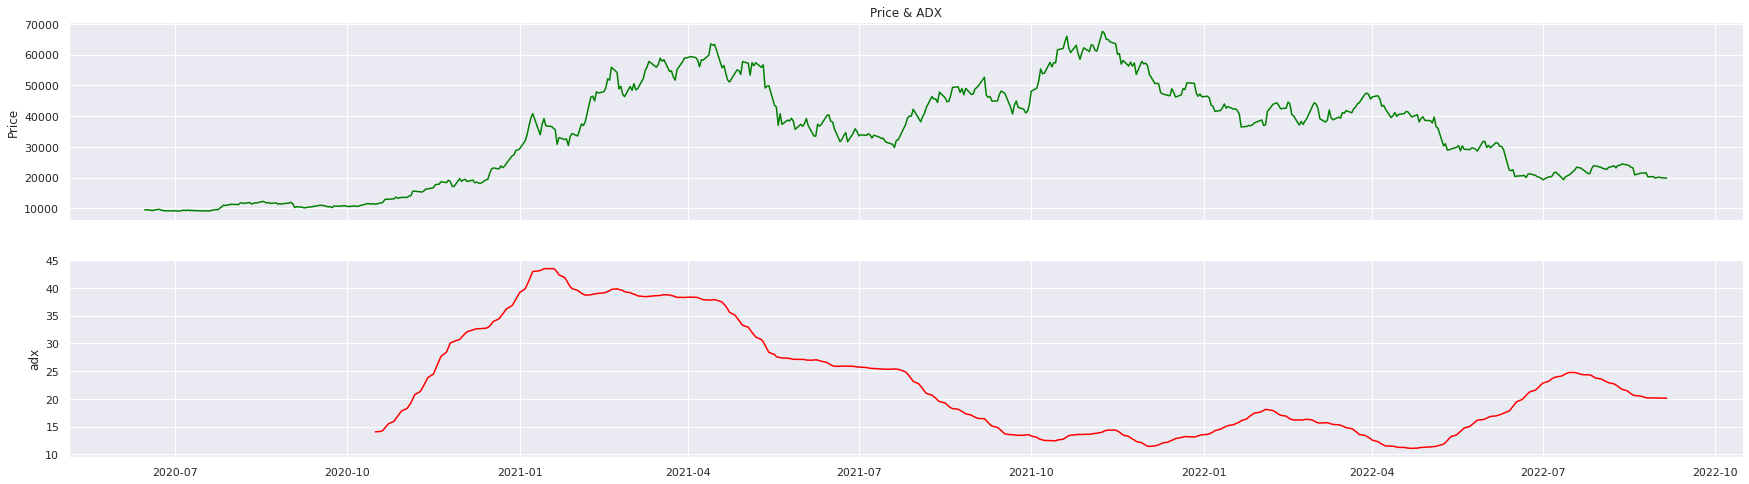

In [ ]:
# CALCULATE ADX 
btc['adx']=talib.ADX(btc['high'], btc['low'], btc['close'], timeperiod=45)

# CREATE ADX SUBPLOTS
fig, (ax1, ax2)=plt.subplots(2, figsize=(30,8), sharex=True)
ax1.set_ylabel('Price')
ax1.plot(btc['close'], color='Green')
ax2.set_ylabel('adx')
ax2.plot(btc['adx'], color='red')

ax1.set_title('Price & ADX')
plt.show()

In [ ]:
combined_df=combined_df[combined_df.Signal!=0]
signal=combined_df.iloc[0, 0]


buysellpoint=[]
for index, row in combined_df.iterrows(): 
  if row['Signal']!=signal: 
    buysellpoint.append(index)
    signal=row['Signal']
transactions=combined_df[combined_df.index.isin(buysellpoint)]
if transactions.iloc[0, 0]==-1: 
  transactions=transactions.iloc[1:]
transactions=pd.concat([transactions, transactions[['Price']].pct_change()], axis=1)
transactions=transactions.fillna(0)
transactions.columns=['Signal', 'Price', 'EMA_short', 'EMA_long', 'UpperBB', 'LowerBB', 'gainloss']

transactions['net']=np.nan
invest=1000
transactions['net']=np.nan
for i in range(0, transactions.shape[0]): 
  transactions.iloc[i, -1]=invest+invest*transactions.iloc[i, -2]
  print(str(transactions.index[i])+': '+str(invest+invest*transactions.iloc[i, -2]))
  invest=transactions.iloc[i, -1]


2020-09-16 00:00:00: 1000.0
2020-09-23 00:00:00: 933.6013631239521
2020-09-29 00:00:00: 988.1306812959216
2021-05-13 00:00:00: 4529.988201955402
2021-07-29 00:00:00: 3645.4457581362594
2021-09-22 00:00:00: 3970.3766662991734
2021-09-23 00:00:00: 4090.704797690541
2021-09-24 00:00:00: 3903.4277684095186
2021-10-04 00:00:00: 4475.018336843205
2021-11-26 00:00:00: 4881.11416821561
2022-03-24 00:00:00: 4005.586608583164
2022-04-12 00:00:00: 3656.2669648611536


## Identifing EMA_short and EMA_long that perform better than buy-and-hold stretegy

In [ ]:
ticker='matic-usd'
end_date=date.today()
btc=load_data(ticker, '2019-01-01', end_date)
btc.index=btc.date
invest=1000
btc=btc.drop(['date'], axis=1)
buyandhold=((btc.iloc[-1, 2]-btc.iloc[0, 2])/btc.iloc[0, 2])*invest
timeframes=pd.DataFrame(columns=['EMA_short', 'EMA_long', 'returns'])

In [ ]:
buyandhold

451159.33880656416

In [ ]:
tt=0
dfs=[]
for shortime in range(2, 21): 
  for longtime in range (21, 366): 
    invest=1000
    # print(shortime, longtime)
    # Calculate the indicators
    EMA_short = talib.EMA(btc['close'], timeperiod=shortime).to_frame()
    EMA_long = talib.EMA(btc['close'], timeperiod=longtime).to_frame()
    # Create the signal DataFrame
    signal=EMA_long.copy()
    signal[EMA_long.isnull()]=0

    # # Construct the signal
    signal[EMA_short > EMA_long] = 1
    signal[EMA_short < EMA_long] = -1

    # # Plot the signal, price and MAs
    combined_df = bt.merge(signal, btc[['close']], EMA_short, EMA_long)
    combined_df.columns = ['Signal', 'Price', 'EMA_short', 'EMA_long']
    combined_df=combined_df[combined_df.Signal!=0]

    signal=combined_df.iloc[0, 0]
    buysellpoint=[]
    for index, row in combined_df.iterrows(): 
      if row['Signal']!=signal: 
        buysellpoint.append(index)
        signal=row['Signal']
    transactions=combined_df[combined_df.index.isin(buysellpoint)]
    if transactions.shape[0]>0: 
      if transactions.iloc[0, 0]==-1: 
        transactions=transactions.iloc[1:]
      transactions=pd.concat([transactions, transactions[['Price']].pct_change()], axis=1)
      transactions=transactions.fillna(0)
      transactions.columns=['Signal', 'Price', 'EMA_short', 'EMA_long', 'gainloss']
    transactions['shorttime']=shortime
    transactions['longtime']=longtime
    transactions['net']=np.nan
    for i in range(0, transactions.shape[0]):
      # print(i) 
      transactions.iloc[i, 5]=invest+invest*transactions.iloc[i, 4]
      # print(str(transactions.index[i])+': '+str(invest+invest*transactions.iloc[i, -2]))
      invest=transactions.iloc[i, -1]
    dfs.append(transactions.tail(1))
    if transactions.shape[0]>0: 
      netgains=transactions.tail(1).reset_index()
      netgains=netgains.loc[0, 'net']

      if netgains>buyandhold: 
        timeframes.loc[tt, 'EMA_short']=shortime
        timeframes.loc[tt, 'EMA_long']=longtime
        timeframes.loc[tt, 'returns']=transactions.iloc[-1, -1]
        tt+=1
        print('shortime: '+str(shortime)+ ', '+'longtime: '+str(longtime)+', '+'returns: '+str(transactions.iloc[-1, -1])+', buyandhold: '+str(buyandhold))
timeframes.sort_values(['returns'], ascending=False)

,EMA_short,EMA_long,returns


In [ ]:
transactions

,Signal,Price,EMA_short,EMA_long,shorttime,longtime,net
date,,,,,,,


In [ ]:
transactionsdf=pd.concat(dfs)

In [ ]:
transactionsdf

,Signal,Price,EMA_short,EMA_long,gainloss,shorttime,longtime,net
date,,,,,,,,
2022-03-23,1.0,1.556303,1.535589,1.516322,-0.092334,NaN,21,NaN
2022-03-23,1.0,1.556303,1.535589,1.520853,-0.092334,NaN,22,NaN
2022-03-23,1.0,1.556303,1.535589,1.525527,-0.092334,NaN,23,NaN
2022-03-23,1.0,1.556303,1.535589,1.530316,-0.092334,NaN,24,NaN
2022-03-23,1.0,1.556303,1.535589,1.535197,-0.092334,NaN,25,NaN
...,...,...,...,...,...,...,...,...
2020-11-25,1.0,0.021295,0.017708,0.017408,0.000000,1000.0,361,NaN
2020-11-25,1.0,0.021295,0.017708,0.017402,0.000000,1000.0,362,NaN
2020-11-25,1.0,0.021295,0.017708,0.017397,0.000000,1000.0,363,NaN


In [ ]:
# plot candlestick chart with python
import plotly.graph_objects as go
candlestick = go.Candlestick(
    x=btc.index,
    open=btc['open'],
    high=btc['high'],
    low=btc['low'],
    close=btc['close'])
# create plot
fig = go.Figure(data=[candlestick])
# show the plot
fig.show()

### TECHNICAL INDICATORS

TYPES OF INDICATORS

*   Trend indicators: measure the direction or strength of a trend (ex: moving averages (MA), Avg Directional Movement Index (ADX))
*   Momentum indicators: measure the velocity of price movement (ex: Relative Strength index (RSI))

*   Volatility Indicators: Measure the magnitude of price deviations (ex: Bollinger Bands))

**TREND INDICATORS**

SMAs VS EMAs: 

EMA is more sensitive to the most recent price movement.SMA gives equal weight to all data points, while EMA applies more weight to recent data points.The EMA is less smooth and more responsive to sudden price spikes. If you have a shorter trading timeframe and want to be more sensitive to the recent price fluctuations, EMA should be your choice.

TREND STRENGTH INDICATOR

ADX : Average Directional Movement Index. The average directional movement index (ADX) was developed by J. Welles Wilder as an indicator of trend strength. It combines two other indicators, the plus directional index (+DI) and minus directional indicator (-DI), and is obtained using lengthy calculations. It ossilates between 0 and 100. If ADX <= 25 means no trend or the market is going sideways and has no clear trend. If ADX >=25 means the market is trending. If ADX > 50 means strong trending market. ADX can indicate the strength of a trend, but it does not tell you whether the market is trending upward or downward.









In [ ]:
# calculate two SMAs
btc['sma10']=talib.SMA(btc['close'], timeperiod=10)
btc['sma50']=talib.SMA(btc['close'], timeperiod=90)

# calculate two EMAs
btc['ema10']=talib.EMA(btc['close'], timeperiod=30)
btc['ema50']=talib.EMA(btc['close'], timeperiod=90)

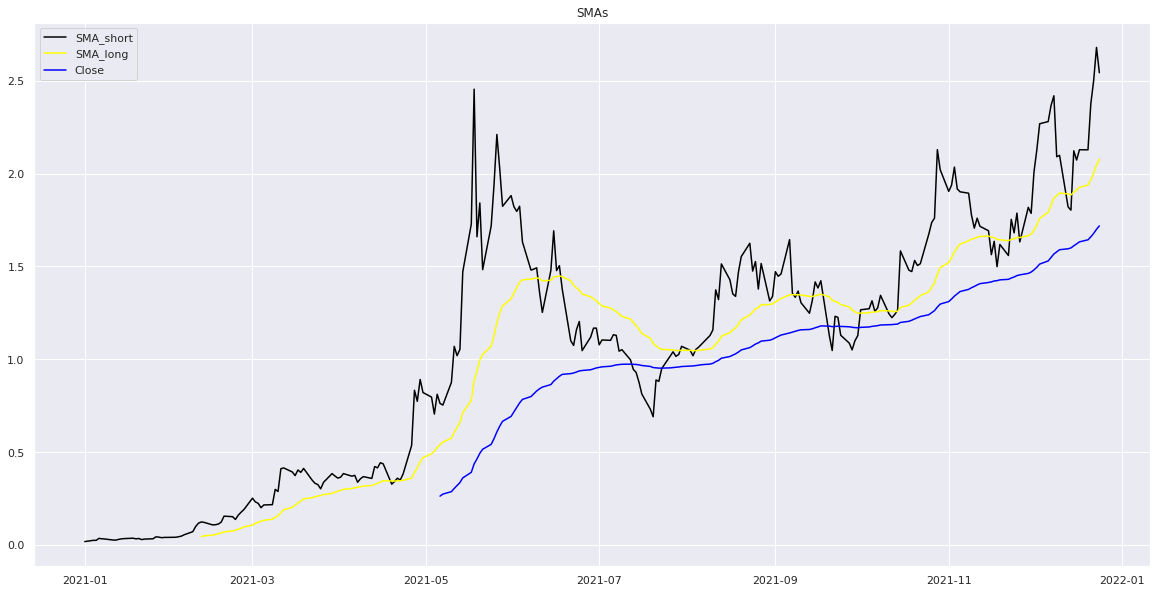

In [ ]:
# plot SMA with price
plt.figure(figsize=(20,10))
plt.plot(btc.close, color='black', label='SMA_short')
plt.plot(btc.ema10, color='yellow', label='SMA_long')
plt.plot(btc.ema50, color='blue', label='Close')
plt.legend()
plt.title('SMAs')
plt.show()

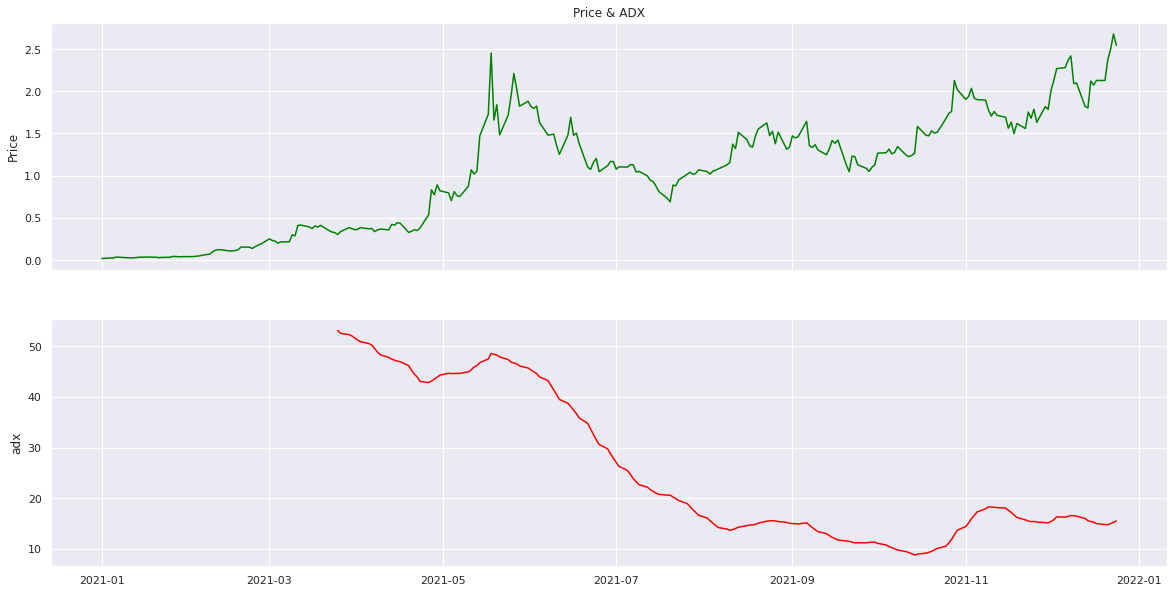

In [ ]:
# CALCULATE ADX 
btc['adx']=talib.ADX(btc['high'], btc['low'], btc['close'], timeperiod=30)

# CREATE ADX SUBPLOTS
fig, (ax1, ax2)=plt.subplots(2, figsize=(20,10), sharex=True)
ax1.set_ylabel('Price')
ax1.plot(btc['close'], color='Green')
ax2.set_ylabel('adx')
ax2.plot(btc['adx'], color='red')

ax1.set_title('Price & ADX')
plt.show()

## MOMENTUM INDICATOR

Relative Strength Index (RSI)

*   Developed by J. Wells Wilder (New Concepts in Technical Systems (1987))
*   Measures the momentum of a trend i.e. rise or falling of prices. 
*   Ossilates between 0 - 100
*   RSI > 70 : Overbrought. i.e. asset is overvalued and price may reverse
*   RSI < 30 : Oversold. i.e. asset is undervalued and price may rally
*   Wells wilder used a timeperiod of 14 days for RSI calculations which became industry standard. 
*   the longer the lookback period the less sensitive is RSI to price fluctuations. Traders should change RSI to suit their specific trading time horizons. 

The RSI calculation follows a straightforward formula. RS, or Relative Strength, is the average of upward price changes in a chosen n periods, divided by the average of downward price changes over those n periods.

RSI = 100 -(100/(1+RS))

Where: RS = average of upward price changes / average of downward price changes













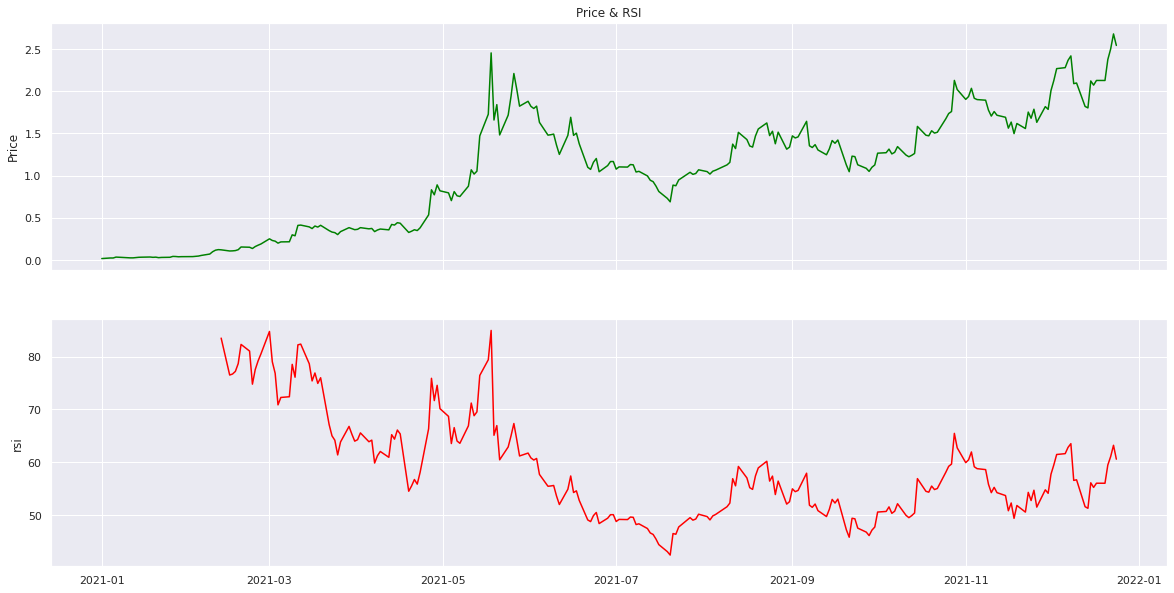

In [ ]:
# Calculate RSI 
btc['rsi']=talib.RSI(btc['close'], timeperiod=30)

# CREATE ADX SUBPLOTS
fig, (ax1, ax2)=plt.subplots(2, figsize=(20,10), sharex=True)
ax1.set_ylabel('Price')
ax1.plot(btc['close'], color='green')
ax2.set_ylabel('rsi')
ax2.plot(btc['rsi'], color='red')

ax1.set_title('Price & RSI')
plt.show()

# VOLATILITY INDICATORS: BOLLINGER BANDS

*   Developed by John Bollinger
*   Measures price volatility
*   Composed of Three Lines
*   Middle Band: n-period simple moving average
*   Upper band: k-standard deviations above the middle band
*   Lower band: k-standard deviations below the middle band
* The wider the bands, the more volatile the asset prices
* BBands measure whether a price is too high or too low on a relative basis.
*Statistically if the upper and lower bands are 1 std then they contain 65% of the price moves. If 2 std then they contain about 95% of the price moves. In other words, the price only moves out of the top and lower bands in only 5% of the cases. 
* Relatively high when the price is close to upper band. And relatively cheap when close to lower band. 

Bollinger Bands are envelopes plotted above and below a simple moving average of the price. Because the distance of the bands is based on the standard deviation, they adjust to volatility swings in the underlying price.









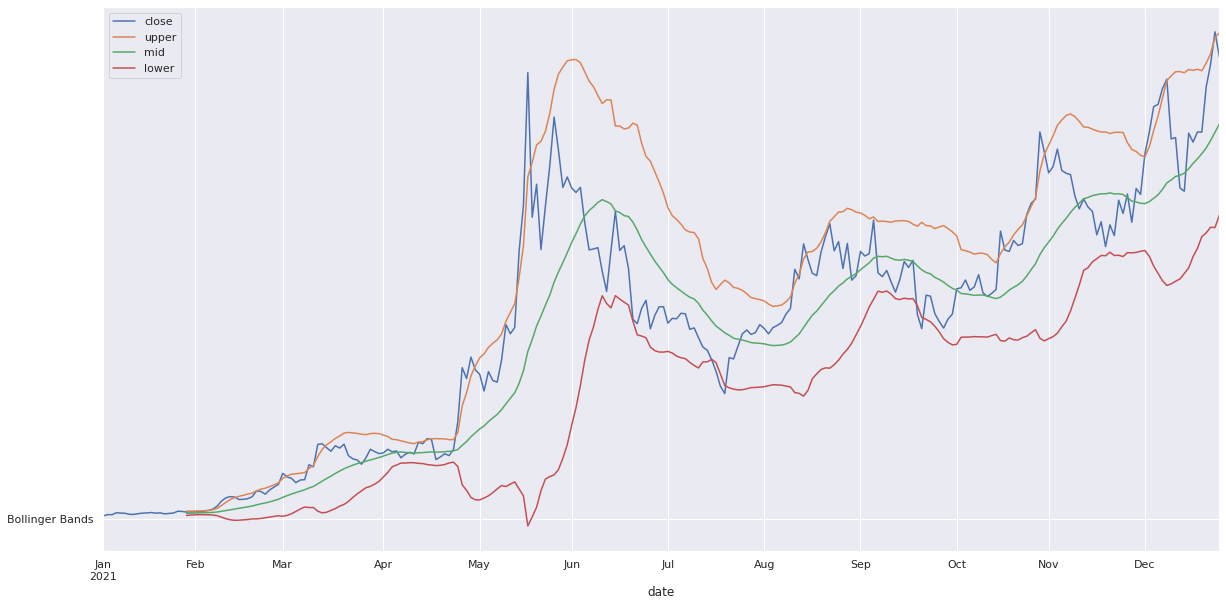

In [ ]:
## DEFINE THE BOLLINGER BANDS
upper, mid, lower = talib.BBANDS(btc['close'], nbdevup=2, nbdevdn=2, timeperiod=20)
btc['upper']=upper
btc['mid']=mid
btc['lower']=lower

# Plot the Bollinger Bands
btc[['close', 'upper', 'mid','lower']].plot(figsize=(20,10))
# plt.figure(figsize=(20,10))
# plt.plot(btc['close'], label='Price')
# plt.plot(upper, label='Upper band')
# plt.plot(mid, label='Middle band')
# plt.plot(lower, label='Lower band')

# Customize and show the plot
plt.plot('Bollinger Bands')
plt.legend()
plt.show()

# TRADING STRATEGIES

What are trading signals? 
*   Triggers to long or short financial assets based on predetermined criteria
*   Can be constructed using: one technical indicator, Multiple technical indicators, A combination of market data and indicators. 
* Commonly used in algorithmic trading. 

HOW TO IMPLEMENT SIGNALS IN bt: 
1. Get the data and calculate indicators
2. Define the signal-based strategy (bt.algos.SelectWhere(), bt.algos.WeightTarget())
3. Create and run a backtest
4. Review and backtest result

TREND FOLLOWING STRATEGY:

Trend-following strategies believe that "the trend is your friend," and use signals to indicate the trend and profit by riding it.You want to build and backtest a trend-following strategy. First, you decide to use two EMAs (exponential moving averages) to construct the signal. When the shorter-term EMA, EMA_short, is larger than the longer-term EMA, EMA_long, you will enter long positions in the market. Vice versa, when EMA_short is smaller than EMA_long, you will enter short positions.

MEAN REVERSION STRATEGY:

Philosophy: Buy the fear and sell the greed

RSI based mean reversion strategy: if RSI > 70, asset is overbrought, and the price may soon reverse/drop, similarly, when RSI < 30, the asset is oversold and the price may soon rally i.e. long signal. 

STRATEGY OPTIMIZATION AND BENCHMARKING




/usr/local/lib/python3.7/dist-packages/ffn/core.py:1408: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/ffn/core.py:2299: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/ffn/core.py:258: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/ffn/core.py:1408: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/ffn/core.py:2299: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/ffn/core.py:1408: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/ffn/core.py:2299: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/ffn/core.py:258: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/ffn/core.py:1408: RuntimeWarning:



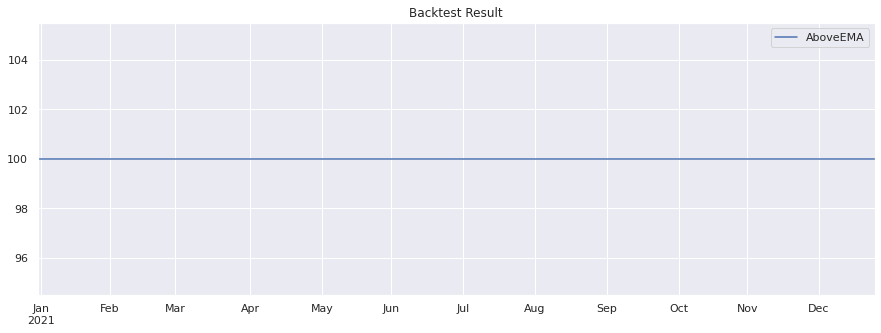

In [ ]:
# CONSTRUCT THE SIGNAL
# Get price data by the stock ticker 
import bt
price_data=btc['close']
# Calculate EMA
ema=talib.EMA(btc['close'], timeperiod=30)
# Define the signal-based strategy
bt_strategy=bt.Strategy('AboveEMA',
                        [bt.algos.SelectWhere(btc[['close']] > ema),
                         bt.algos.WeighEqually(),
                         bt.algos.Rebalance()])

# Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy, btc[['close']])
bt_result=bt.run(bt_backtest)
# bt_result
bt_result.plot(title='Backtest Result')
plt.show()

In [ ]:
# IMPORT BITCOIN DATA
for company in crypto: 
  ticker=company
  start_date='2019-01-01'
  end_date=date.today()
  try: 
    btc=load_data(ticker, start_date, end_date)
    btc.index=btc.date
    btc=btc.drop(['date'], axis=1)

    # Calculate the indicators
    EMA_short = talib.EMA(btc['close'], timeperiod=14).to_frame()
    EMA_long = talib.EMA(btc['close'], timeperiod=90).to_frame()
    # ESTIMATE BOLLINGER BANDS: 
    upper, mid, lower = talib.BBANDS(btc['close'], nbdevup=2, nbdevdn=2, timeperiod=14)
    # atr=talib.ATR(btc['high'], btc['low'], btc['close'], timeperiod=14).to_frame()
    # Create the signal DataFrame
    signal=EMA_long.copy()
    signal[EMA_long.isnull()]=0

    # # Construct the signal
    signal[EMA_short > EMA_long] = 1
    signal[EMA_short < EMA_long] = -1

    # # Plot the signal, price and MAs
    combined_df = bt.merge(signal, btc[['close']], EMA_short, EMA_long, upper, lower)
    combined_df.columns = ['Signal', 'Price', 'EMA_short', 'EMA_long', 'UpperBB', 'LowerBB']
    combined_df.plot(secondary_y=['Signal'], figsize=(30, 5))
    plt.title(ticker)
    plt.show()
  except: 
    print(str(company)+' -not available')

BTC-USD -not available
ETH-USD -not available

1 Failed download:
- ALBO-USD: No data found, symbol may be delisted
ALBO-USD -not available
LINK-USD -not available
XMR-USD -not available
ATOM-USD -not available
SOL-USD -not available
FTM-USD -not available
ADA-USD -not available
MATIC-USD -not available
CRO-USD -not available
LRC-USD -not available
DOT-USD -not available
SHIB-USD -not available
SNT-USD -not available
AVAX-USD -not available
ADS-USD -not available
USDT-USD -not available
DOGE-USD -not available
ALT-USD -not available
SAFEMOON-USD -not available
SHILL-USD -not available
XRP-USD -not available
LUNA-USD -not available
SPIRIT-USD -not available


In [ ]:

# ticker='btc-usd'
start_date='2018-01-01'
end_date=date.today()
try: 
  btc=load_data('BTC-USD', start_date, end_date)
  btc.index=btc.date
  btc=btc.drop(['date'], axis=1)

  # Calculate the indicators
  EMA_short = talib.EMA(btc['close'], timeperiod=14).to_frame()
  EMA_long = talib.EMA(btc['close'], timeperiod=90).to_frame()
  # ESTIMATE BOLLINGER BANDS: 
  upper, mid, lower = talib.BBANDS(btc['close'], nbdevup=2, nbdevdn=2, timeperiod=14)
  # atr=talib.ATR(btc['high'], btc['low'], btc['close'], timeperiod=14).to_frame()
  # Create the signal DataFrame
  signal=EMA_long.copy()
  signal[EMA_long.isnull()]=0

  # # Construct the signal
  signal[EMA_short > EMA_long] = 1
  signal[EMA_short < EMA_long] = -1

  # # Plot the signal, price and MAs
  combined_df = bt.merge(signal, btc[['close']], EMA_short, EMA_long, upper, lower)
  combined_df.columns = ['Signal', 'Price', 'EMA_short', 'EMA_long', 'UpperBB', 'LowerBB']
  combined_df.plot(secondary_y=['Signal'], figsize=(30, 10))
  plt.title(ticker)
  plt.show()
except: 
  print(str(company)+' -not available')

SPIRIT-USD -not available


2012-08-24 00:00:00: 10000.0
2012-09-10 00:00:00: 9817.352102930638
2012-09-21 00:00:00: 10323.147207053986
2012-11-07 00:00:00: 9589.0410591808
2012-12-13 00:00:00: 10323.147207053986
2013-07-15 00:00:00: 10544.433151314519
2013-09-16 00:00:00: 11053.740805182522
2013-11-13 00:00:00: 10540.92060156987
2013-12-23 00:00:00: 10937.82934341046
2014-02-06 00:00:00: 10597.120057583576
2014-02-11 00:00:00: 10892.16753663071
2014-09-26 00:00:00: 12434.142037114047
2014-12-01 00:00:00: 12637.86456270096
2014-12-02 00:00:00: 12578.153226892962
2014-12-03 00:00:00: 12876.712585734387
2014-12-12 00:00:00: 12458.729215376246
2014-12-30 00:00:00: 12809.976150437087
2015-06-15 00:00:00: 13329.821453539043
2016-03-07 00:00:00: 10607.657706817528
2016-05-03 00:00:00: 9901.651286951195
2016-06-08 00:00:00: 10463.646517038613
2016-11-15 00:00:00: 10716.544069100288
2017-01-23 00:00:00: 11236.389372202244
2017-10-02 00:00:00: 12637.864562700954
2017-10-18 00:00:00: 12932.912041748088
2017-11-17 00:00:00:

In [ ]:
combined_df.head(1)

,Signal,Price,EMA_short,EMA_long,UpperBB,LowerBB
date,,,,,,
2018-05-10,-1.0,68.290001,66.986836,67.703333,68.026465,65.466395


In [ ]:
combined_df.tail(1)

,Signal,Price,EMA_short,EMA_long,UpperBB,LowerBB
date,,,,,,
2022-01-21,-1.0,107.559998,113.141717,113.988425,119.988444,108.274413


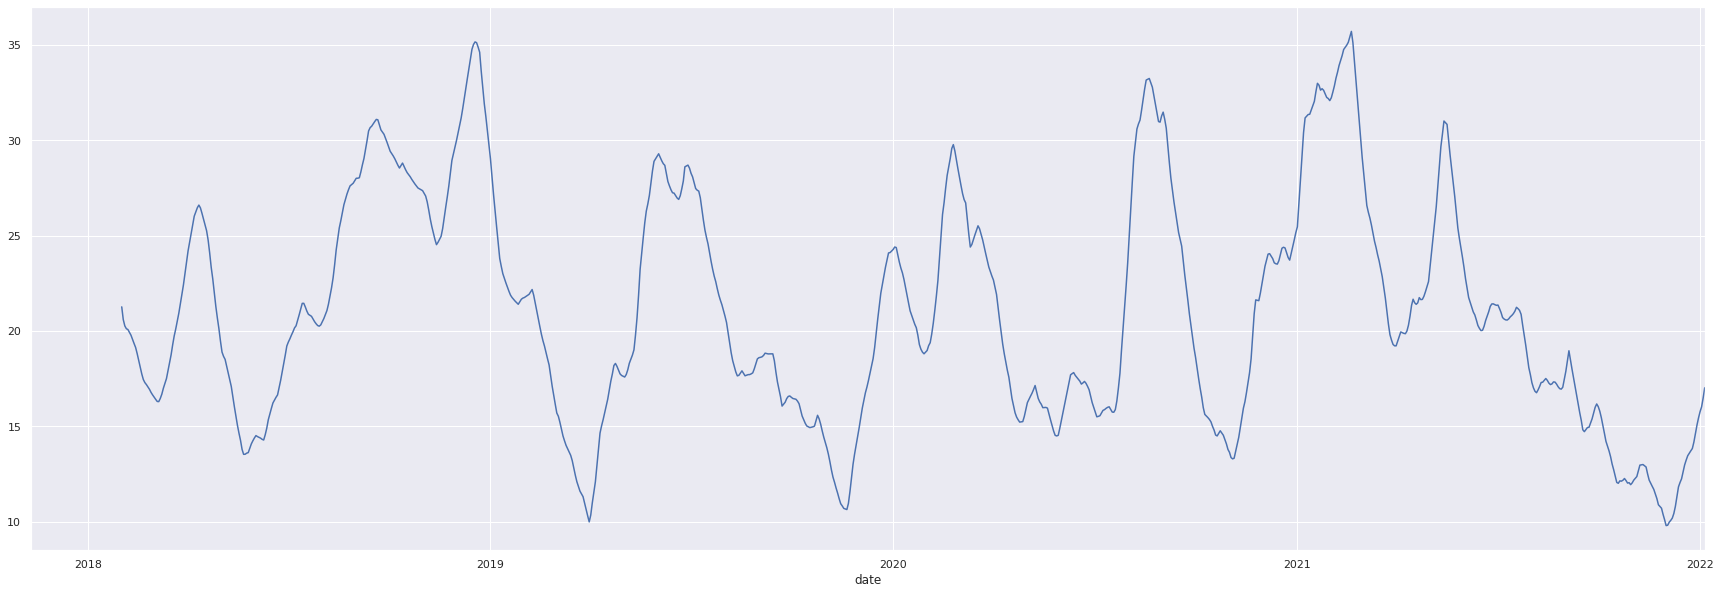

In [ ]:
  # Estimate ADX
adx=talib.ADX(btc['high'], btc['low'], btc['close'], timeperiod=30)
adx.plot(figsize=(30,10))

In [ ]:
combined_df.tail()

,Signal,Price,EMA_short,EMA_long,UpperBB,LowerBB
date,,,,,,
2021-12-28,-1.0,346.220001,335.183122,336.229435,346.510401,322.982457
2021-12-29,-1.0,342.940002,336.217373,336.376920,347.855159,323.406272
2021-12-30,1.0,344.359985,337.303055,336.552372,349.209103,324.129467
2021-12-31,1.0,336.350006,337.175982,336.547924,349.086767,325.194661
2022-01-03,1.0,338.540009,337.357852,336.591706,349.301199,325.558803


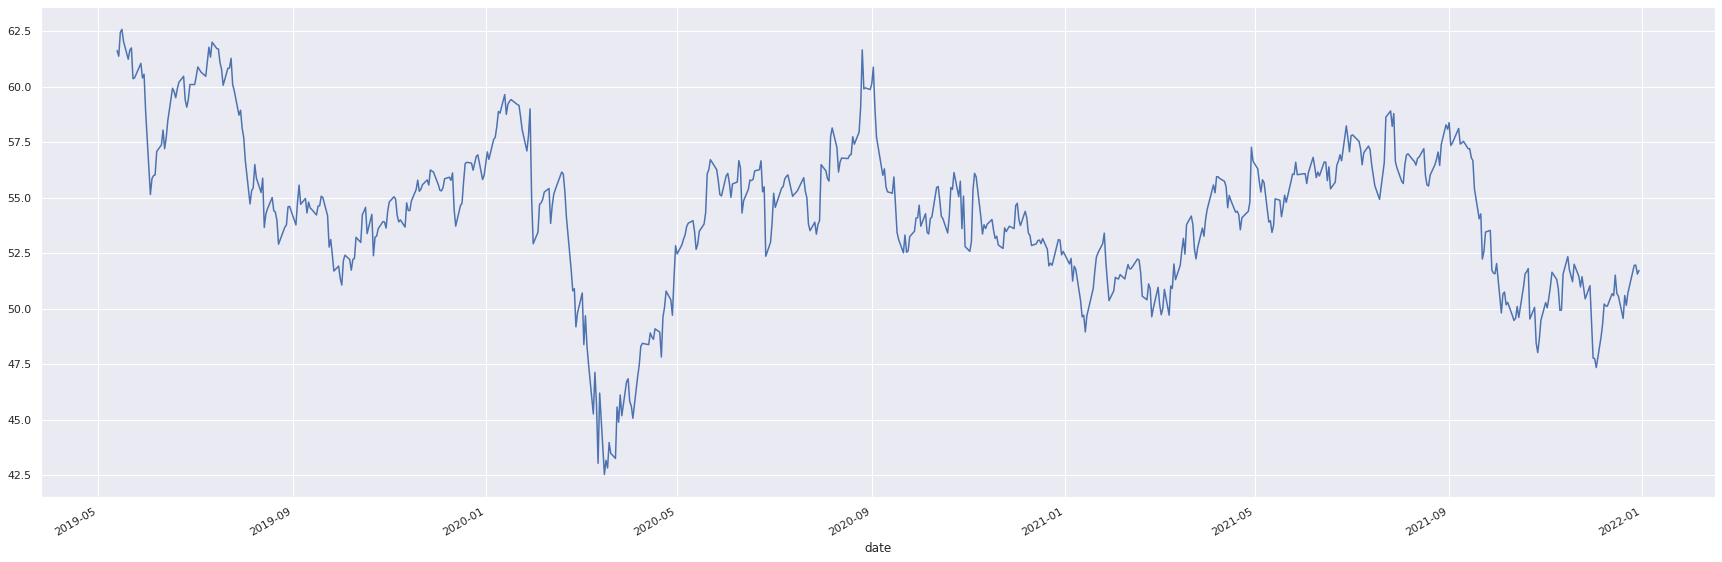

In [ ]:
adx=talib.RSI(btc['close'], timeperiod=90)
adx.plot(figsize=(30,10))

In [ ]:
# BACK TEST THE STRATEGY
# Define the strategy
bt_strategy=bt.Strategy('EMA_crossover',
                        [bt.algos.WeighTarget(signal),
                         bt.algos.Rebalance()])

#Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy, btc[['close']], initial_capital=10000.0)
bt_result=bt.run(bt_backtest)

#Plot the backtest result
bt_result.plot(title='Backtest result')

Exception: ignored

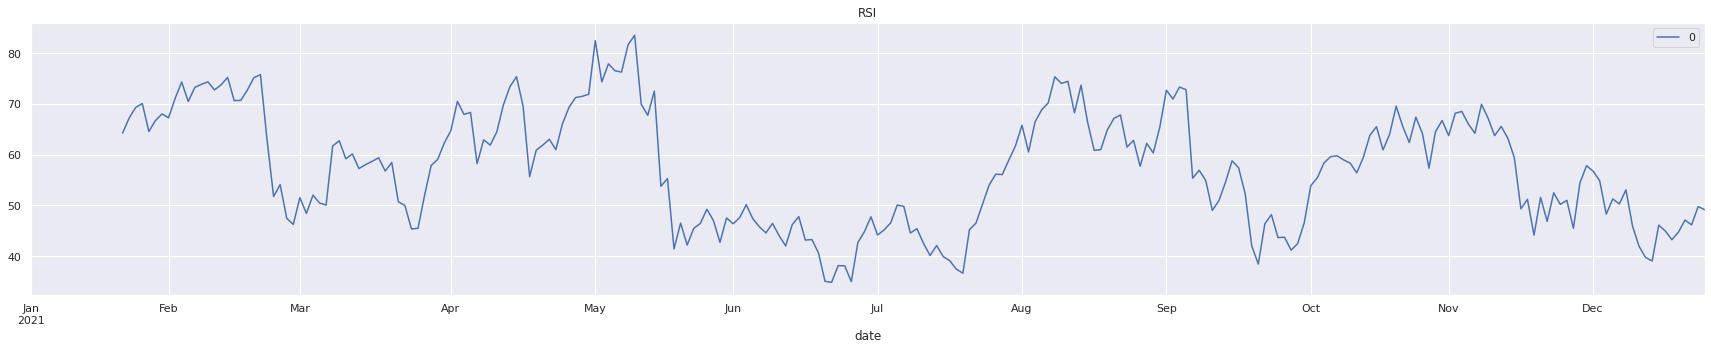

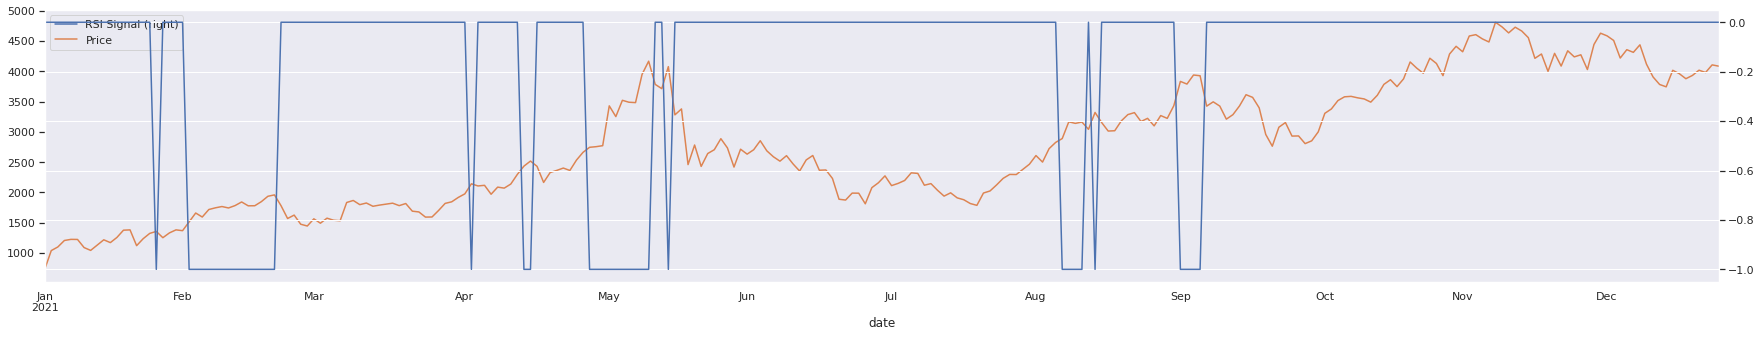

In [ ]:
# IMPLEMENT MEAN REVERSION STARTEGY USING RSI BASED SIGNAL
# Calculate the RSI
btc_rsi = talib.RSI(btc['close']).to_frame()

# Create the same DataFrame structure as RSI
rsi_signal=btc_rsi.copy()
rsi_signal[rsi_signal.isnull()]=0

# Construct the signal
rsi_signal[btc_rsi < 30] = 1
rsi_signal[btc_rsi > 70] = -1
rsi_signal[(btc_rsi <= 70) & (btc_rsi >=30)] = 0

# Plot the Signal
btc_rsi.plot(figsize=(30, 5))
plt.title('RSI')

# Merge data into one DataFrame
combined=bt.merge(rsi_signal, btc[['close']])
combined.columns = ['RSI Signal', 'Price']
combined.plot(secondary_y = ['RSI Signal'], figsize=(30,5))
plt.show()

##Conduct a strategy optimization

You have an SMA-based signal strategy to trade stocks. However, you are not sure what lookback period to use for calculating the SMA that can optimize the strategy performance. You plan to run multiple backtests on different input parameters. Also, you want the capability to assess the strategy on trading different stocks or based on different historical periods.

In [ ]:
# STRATEGY OPTIMIZATION using SMA

def signal_strategy(ticker, period, name, start, end): 
  # Get the data and calculate SMA
  price_data = load_data(ticker, start, end)
  sma=talib.SMA(price_data['close'], timeperiod=period)
  # Define the signal-based strategy
  bt_strategy = bt.Strategy(name, 
                            [bt.algos.SelectWhere(price_data[['close']]>sma),
                             bt.algos.WeighEqually(),
                             bt.algos.Rebalance()])
  
  # Return the backtest
  return bt.Backtest(bt_strategy, price_data[['close']])

def buy_and_hold(ticker, name, start, end): 
  # Get the data
  price_data = bt.get(ticker, start=start, end=end)
  # Define the benchmark strategy
  bt_strategy = bt.Strategy(name, 
                            [bt.algos.RunOnce(),
                             bt.algos.SelectAll(),
                             bt.algos.WeighEqually(),
                             bt.algos.Rebalance()])
  # Return the backtest
  return bt.Backtest(bt_strategy, price_data)


In [ ]:
ticker = 'BTC-USD'
sma20 = signal_strategy(ticker, 20, 'SMA20', '2021-01-01', '2021-12-31')
sma50 = signal_strategy(ticker, 50, 'SMA50', '2021-01-01', '2021-12-31')
sma100 = signal_strategy(ticker, 100, 'SMA100', '2021-01-01', '2021-12-31')

# Run backtests and compare results
bt_results = bt.run(sma20, sma50, sma100)
bt_results.plot(title = 'Strategy optimization')

In [ ]:
pd.DataFrame(rsi_signal).value_counts()

In [ ]:
# Step 1: import data
# data1 = load_data('BTC-USD', '2020-01-01', '2021-12-31')
# data1.index=data1.date
# data1=data1[['close']]
data2 = load_data('ETH-USD', '2020-01-01', '2021-12-31')
data=data2[['close']]
# estimate moving averages
ema14 = talib.EMA(data2['close'], timeperiod=10)
ema40 = talib.EMA(data2['close'], timeperiod=40)

# Create the signal DataFrame
signal=ema40.copy()
signal[ema40.isnull()]=0

# # Construct the signal
signal[ema14 > ema40] = 1
signal[ema14 < ema40] = -1

# data2.index=data2.date
# data2=data2[['close']]
# data=pd.concat([data2], axis=1)
# data.columns=['eth']

# Step 2: Create the strategy
s = bt.Strategy('s1', 
                [bt.algos.SelectWhere(signal),
                 bt.algos.WeighEqually(),
                 bt.algos.Rebalance()])

# Create a backtest and run
test = bt.Backtest(s, data)
res = bt.run(test)

TypeError: ignored

In [ ]:
signal

0      0.0
1      0.0
2      0.0
5      0.0
6      0.0
      ... 
719   -1.0
720   -1.0
721   -1.0
722   -1.0
723   -1.0
Length: 518, dtype: float64

In [ ]:
res.plot(figsize=(30,10))

In [ ]:
res.display()

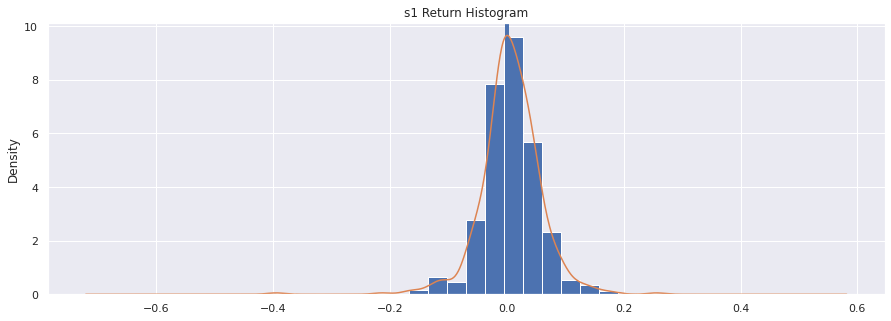

In [ ]:
res.plot_histogram()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [ ]:
ticker = 'AAPL'
start = '2021-01-01'
end = '2021-12-31'

stock=load_data(ticker, start, end)
# estiamte relative strength index
stock['rsi']=talib.RSI(stock['close'], timeperiod=90)


## IDENTIFY HIGH MOMENTUM STOCKS ON S&P 500

In [ ]:
# identify high momentum stocks on S&P 500
table=pd.read_html(r'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
sp500=table[0]
sp500.head()
# initiaize an empty dataframe
timeperiods=[14, 45, 90, 180, 365]
df=pd.DataFrame(columns=['stock']+['rsi'+str(x) for x in timeperiods])

In [ ]:
# create a list of tickers to query
stocks=sp500.Symbol.unique()
i=0
for company in stocks: 
  try:
    # import stock data
    stock=load_data(company, '2010-01-01', '2021-12-31')
    out_path=r'/content/gdrive/MyDrive/FINANCE_WEALTH/momentum-investing-master/sp500/'+str(company)+'.csv'
    stock.to_csv(out_path)
    df.loc[i, 'stock']=company
    #Estimate RSIs
    for time in timeperiods: 
      stock['rsi'+str(time)]=talib.RSI(stock['close'], timeperiod=time)
      df.loc[i, 'rsi'+str(time)]=stock.loc[stock.index[-1], 'rsi'+str(time)]
    i+=1
  except: 
    print(str(company)+': failed to download')



## IMPORT NASDAQ STOCKS

In [ ]:
# initiate connection with google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
nasdaq=pd.read_csv(r'/content/gdrive/MyDrive/FINANCE_WEALTH/momentum-investing-master/nasdaq_listings.csv')

In [ ]:
# import and save historical data for nasdaq stocks
for company in nasdaq.Symbol.unique(): 
  try: 
    # import stock data
    stock=load_data(company, '2015-01-01', '2021-12-31')
    out_path=r'/content/gdrive/MyDrive/FINANCE_WEALTH/momentum-investing-master/nasdaq/'+str(company)+'.csv'
    stock.to_csv(out_path)
  except: 
    print(str(company)+': Failed to download')


1 Failed download:
- THACW: None

1 Failed download:
- USCTW: No data found, symbol may be delisted

1 Failed download:
- VTAQR: None

1 Failed download:
- WHLRL: None


In [ ]:
df_nasdaq=pd.DataFrame(columns=['stock','rsi14','rsi45', 'rsi90', 'rsi180', 'rsi365'])
nasdaq_listings=nasdaq.Symbol.unique()
i=0
for company in nasdaq_listings: 
  try: 
    # import stock data
    stock=load_data(company, '2020-01-01', '2021-12-31')
    #Estimate RSIs
    stock['rsi14']=talib.RSI(stock['close'], timeperiod=14)
    stock['rsi45']=talib.RSI(stock['close'], timeperiod=40)
    stock['rsi90']=talib.RSI(stock['close'], timeperiod=90)
    stock['rsi180']=talib.RSI(stock['close'], timeperiod=180)
    stock['rsi365']=talib.RSI(stock['close'], timeperiod=365)

    df_nasdaq.loc[i, 'stock']=company
    df_nasdaq.loc[i, 'rsi14']=stock.loc[stock.index[-1], 'rsi14']
    df_nasdaq.loc[i, 'rsi45']=stock.loc[stock.index[-1], 'rsi45']
    df_nasdaq.loc[i, 'rsi90']=stock.loc[stock.index[-1], 'rsi90']
    df_nasdaq.loc[i, 'rsi180']=stock.loc[stock.index[-1], 'rsi180']
    df_nasdaq.loc[i, 'rsi365']=stock.loc[stock.index[-1], 'rsi365']
    i+=1
  except: 
    print(str(company)+' : Delisted')


In [ ]:
import glob
timeperiod=[14, 45, 90, 180, 360]
df_nasdaq=pd.DataFrame(columns=['stock']+['rsi'+str(x) for x in timeperiod])
i=0
for company in glob.glob(r'/content/gdrive/MyDrive/FINANCE_WEALTH/momentum-investing-master/nasdaq/*.csv'): 
  # import stock data
  try: 
    stock=pd.read_csv(company)
    if stock.shape[0]>365:  
      #Estimate RSIs
      df_nasdaq.loc[i, 'stock']=company.split('/')[-1].split('.')[0]
      for time in timeperiod: 
        stock['rsi'+str(time)]=talib.RSI(stock['close'], timeperiod=time)
        df_nasdaq.loc[i, 'rsi'+str(time)]=stock.loc[stock.index[-1], 'rsi'+str(time)]
      i+=1
  except: 
    print('Data empty')
df_nasdaq.to_csv(r'/content/gdrive/MyDrive/FINANCE_WEALTH/momentum-investing-master/Output/nasdaq_rsi.csv')    

Data empty
Data empty


In [ ]:
period=[14, 45, 90, 180, 365]
cols=['stocks']+['rsi'+str(x) for x in period]
cols

['stocks', 'rsi14', 'rsi45', 'rsi90', 'rsi180', 'rsi365']

In [ ]:
# create a list of tickers to query
import glob
i=0
timeperiods=[14, 45, 90, 180, 365]
df_sp500=pd.DataFrame(columns=['stock','rsi14','rsi45', 'rsi90', 'rsi180', 'rsi365'])
for company in glob.glob(r'/content/gdrive/MyDrive/FINANCE_WEALTH/momentum-investing-master/sp500/*.csv'):
  try: 
    # import stock data
    print(company)
    stock=pd.read_csv(company)
    df_sp500.loc[i, 'stock']=company.split('/')[-1].split('.')[0]
    #Estimate RSIs
    for time in timeperiods: 
      stock['rsi'+str(time)]=talib.RSI(stock['close'], timeperiod=time)
      df_sp500.loc[i, 'rsi'+str(time)]=stock.loc[stock.index[-1], 'rsi'+str(time)]
    i+=1
  except:
    print('No data downloaded')

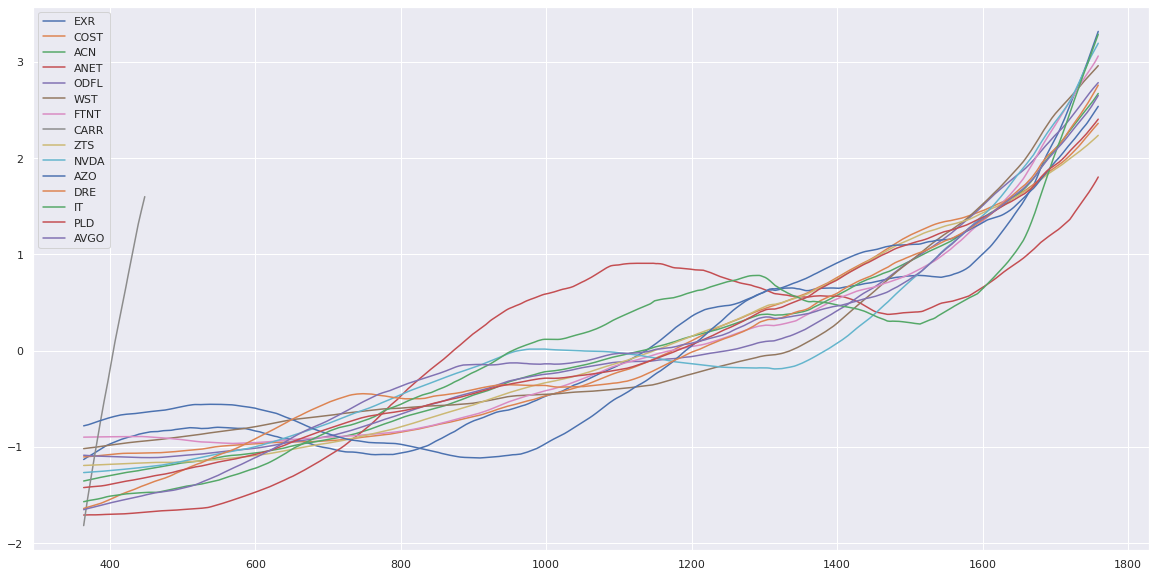

In [ ]:
from sklearn import preprocessing

ticks=df_sp500.sort_values(['rsi365', 'rsi180'], ascending=False).head(15)['stock']
dfs=[]
for ticker in ticks: 
  df=load_data(ticker, '2015-01-01', '2021-12-31')
  sma=talib.SMA(df['close'], timeperiod=365)
  sma=(sma-sma.mean())/sma.std()
  sma=pd.DataFrame(sma)
  sma.columns=[ticker]
  dfs.append(sma)
smas=pd.concat(dfs)
smas.plot(figsize=(20,10))

In [ ]:
df_sp500.to_csv(r'/content/gdrive/MyDrive/FINANCE_WEALTH/momentum-investing-master/Output/sp500_rsi.csv', index=False)

In [ ]:
type(sma)

pandas.core.series.Series

In [ ]:
year=2013
dfs=[]
for ticker in stocks: 
  try: 
    # investment return estimator
    stock=load_data(ticker, str(year)+'-01-01', str(year)+'-12-31')
    start=stock.iloc[0, 4]
    end=stock.iloc[-1, 4]
    growth=((end-start)/start)*100
    dfs.append(growth)
    print(str(ticker)+': '+str(growth))
  except: 
    print(str(ticker)+' : not available')

print('Average: '+str(np.mean(dfs)))

xom: 13.076314501001384
aapl: 0.9999464026082377
msft: 35.01086090684687
ge: 30.693542453020484
cvx: 12.537371178374126
ibm: -5.062388956939618
pg: 18.172648394968448

1 Failed download:
- JP: Data doesn't exist for startDate = 1356998400, endDate = 1388448000
jp : not available
wfc: 29.814553467636074
Average: 16.9053560434395


## CRYPTOCURRENCY

In [ ]:
import glob
start_year=2018
end_year=2021
timeperiod=[14, 45, 90, 180, 365]
df_crypto=pd.DataFrame(columns=['stock']+['rsi'+str(x) for x in timeperiod])
i=0
for company in crypto: 
  # import stock data
  try: 
    stock=load_data(company+'-USD', str(start_year)+'-01-01', str(end_year)+'-12-31')
    stock.to_csv(r'/content/gdrive/MyDrive/FINANCE_WEALTH/momentum-investing-master/cryptocurrency/'+str(company)+'.csv')
    if stock.shape[0]>180: 
      print('Estimating: '+str(company)) 
      #Estimate RSIs
      df_crypto.loc[i, 'stock']=company.split('/')[-1].split('.')[0]
      for time in timeperiod: 
        stock['rsi'+str(time)]=talib.RSI(stock['close'], timeperiod=time)
        df_crypto.loc[i, 'rsi'+str(time)]=stock.loc[stock.index[-1], 'rsi'+str(time)]
      i+=1
  except: 
    print('Data empty')
df_crypto.to_csv(r'/content/gdrive/MyDrive/FINANCE_WEALTH/momentum-investing-master/Output/crypto_rsi.csv') 

In [ ]:
df_crypto.sort_values(['rsi180'], ascending=False).head(20)

,stock,rsi14,rsi45,rsi90,rsi180,rsi365
26,SAND,56.6348,60.8935,61.7292,61.8036,NaN
70,GNO,62.0894,58.5463,57.9184,57.529,57.2419
58,ROSE,72.2923,61.9234,59.4392,57.4796,NaN
11,CRO,49.8826,56.2587,57.2085,56.8934,56.1761
20,MANA,47.4421,55.0102,56.5009,56.8634,56.8814
21,MANA,47.4421,55.0102,56.5009,56.8634,56.8814
49,KDA,49.8442,53.9128,55.78,56.6232,56.7971
7,AVAX,53.2838,55.887,56.4942,56.5105,NaN
10,MATIC,58.8128,57.6657,56.5934,56.1615,56.0423
41,LRC,46.9036,54.092,55.6814,56.0043,55.8997


In [ ]:
# IDENTIFY MOMENTUM STOCKS FROM BINANCE EXCHANGE
# preprocess crypto tickers available on binance and coinbase
binance=pd.read_excel(r'/content/gdrive/MyDrive/FINANCE_WEALTH/momentum-investing-master/binance_coinbase.xlsx', names=['name', 'exchange'])
binance['ticker']=binance.name.apply(lambda x: x.split('(')[-1].replace(')', '').strip())
binance=np.array(binance.ticker.unique())

coinbase=pd.read_excel(r'/content/gdrive/MyDrive/FINANCE_WEALTH/momentum-investing-master/binance_coinbase.xlsx', 'coinbase', names=['names'])
coinbase=coinbase.drop_duplicates(['names'], keep='first')
coins=[]
for sign in coinbase['names']: 
  if 'logo' not in str(sign): 
    ticker=str(sign).split(' ')[-1].strip()
    coins.append(ticker)
coinbase=coins

In [ ]:
import glob
start_year=2018
end=date.today()
timeperiod=[14, 45, 90, 180, 365]
df_crypto=pd.DataFrame(columns=['stock']+['rsi'+str(x) for x in timeperiod])
i=0
for company in coinbase: 
  # import stock data
  try: 
    stock=load_data(company+'-USD', str(start_year)+'-01-01', end)
    stock.to_csv(r'/content/gdrive/MyDrive/FINANCE_WEALTH/momentum-investing-master/cryptocurrency/'+str(company)+'.csv')
    if stock.shape[0]>180: 
      print('Estimating: '+str(company)) 
      #Estimate RSIs
      df_crypto.loc[i, 'stock']=company.split('/')[-1].split('.')[0]
      for time in timeperiod: 
        stock['rsi'+str(time)]=talib.RSI(stock['close'], timeperiod=time)
        df_crypto.loc[i, 'rsi'+str(time)]=stock.loc[stock.index[-1], 'rsi'+str(time)]
      i+=1
  except: 
    print('Data empty')
df_crypto.to_csv(r'/content/gdrive/MyDrive/FINANCE_WEALTH/momentum-investing-master/Output/coinbase_rsi.csv') 

Estimating: ZRX
Estimating: nan
Estimating: 1INCH
Estimating: AAVE
Estimating: ALCX
Estimating: ACH
Estimating: ALGO
Estimating: AMP
Estimating: FORTH
Estimating: ANKR
Estimating: API3
Estimating: ARPA
Estimating: ASM
Estimating: REP
Estimating: AVAX
Estimating: AVT
Estimating: AXS
Estimating: BADGER
Estimating: BAL
Estimating: BNT
Estimating: BAND
Estimating: BOND
Estimating: BAT
Estimating: BTC
Estimating: BCH
Estimating: BLZ
Estimating: FIDA
Estimating: AUCTION
Estimating: ADA
Estimating: CTSI

1 Failed download:
- CGLD-USD: No data found, symbol may be delisted
Estimating: LINK
Estimating: CHZ
Estimating: CVC
Estimating: COMP
Estimating: ATOM
Estimating: COTI
Estimating: COVAL
Estimating: CTX
Estimating: CRO
Estimating: CRV
Estimating: DAI
Estimating: DASH
Estimating: MANA
Estimating: DDX
Estimating: YFII
Estimating: DIA
Estimating: DNT
Estimating: DOGE
Estimating: ENJ
Estimating: MLN
Estimating: EOS
Estimating: ETH
Estimating: ETC
Estimating: FET
Estimating: FIL
Estimating: FX
Est

In [ ]:
df_crypto.sort_values(['rsi180'], ascending=False)

,stock,rsi14,rsi45,rsi90,rsi180,rsi365
115,SHPING,42.026161,51.933318,53.862325,54.667699,54.880832
10,API3,69.321263,59.188552,55.015341,53.283968,NaN
38,CRO,47.455658,49.861221,52.009867,53.021818,53.336505
42,MANA,45.285741,49.515454,51.704044,52.955637,53.544148
14,AVAX,47.207295,49.278306,51.241173,52.600928,53.543175
34,ATOM,60.846759,52.734468,52.351396,52.522005,52.506105
100,POWR,50.066755,51.469991,52.154519,52.356534,51.190188
99,NCT,42.633956,49.733984,51.47577,52.237268,52.410382
101,PRO,46.196978,49.959098,51.339757,52.003234,51.560884
111,RNDR,46.211779,48.135602,50.370771,51.696079,52.532025
